# PHY 321 - Final
Dravin Flores

---

## Exercise 1: Mathematical Pendulum

> ### A.

Assuming that this is an isolated system, there are only two forces acting on the mass: the force of gravity and the force of tension. This would mean that the net force can be given as 

$$
    \mathbf{F}_{\text{n}} = \mathbf{F}_g + \mathbf{F}_T
$$

Or equivalently

$$
    m \ddot{\mathbf{r}} = \mathbf{F}_g + \mathbf{F}_T
$$

> ### B.

We want to now transform these equations from cartesian to polar. We can immediately note that the length of the rod is constant. Which means

$$
    \mathbf{r} = l, \quad \frac{d \mathbf{r}}{dt} = 0, \quad \frac{d^2 \mathbf{r}}{dt^2} = 0
$$

Given this, we can now expect that

$$
\mathbf{F} = m \mathbf{a} \quad \iff \quad
\left\{
    \begin{array}{ll}
        F_r = m \left( \ddot{r} - r \dot{\phi}^2 \right)\\
        F_\phi = m \left( r \ddot{\phi} + 2\dot{r} \dot{\phi} \right)
    \end{array}
\right.
$$

Using the fact that the radial length is constant, we can state that

$$
    F_r = -m r \dot{\phi}^2 \\
    F_\phi = m r \ddot{\phi}
$$

Using the notion that $\mathbf{F}_{\text{n}} = \mathbf{F}_g + \mathbf{F}_T$, we can find that

$$
    F_r = mg \cos{\phi} - F_T, \quad F_\phi = -mg \sin{\phi}
$$

We can then find that

$$
    F_\phi = m r \ddot{\phi} = -mg \sin{\phi}
$$

Which means we can find that

$$
    \ddot{\phi} = - \frac{g}{r} \sin{\phi}
$$

If we define the constant $\omega_0^2 = \frac{g}{r}$, we have

$$
    \ddot{\phi} = -\omega_0^2 \sin{\phi}
$$

We can then find the tension force as

$$
    F_T = mg \cos{\phi} - F_r = mg \cos{\phi} + m r \dot{\phi}^2
$$

We can replace the $r$ with the length $l$ giving us

$$
    F_T = mg \cos{\phi} + m l \dot{\phi}^2
$$

> ### C.

We want to produce an analytical solution to the following equation

$$
    \ddot{\phi} = -\omega_0^2 \sin{\phi}
$$

We will first assume that

$$
    \sin{\phi} \approx \phi
$$

This means we want to solve the equation

$$
    \ddot{\phi} = -\omega_0^2 \phi
$$

We know that this solution will have the form

$$
    \phi(t) = A \sin{(\omega t)} + B \cos{(\omega t)}
$$

Of course, these constants will depend on the initial conditions of the system. However, a reasonable solution can be found as

$$
    \phi(t) = \phi_0 \cos{(\omega t)}
$$

This solution corresponds to the mass being released from rest, with some initial angle $\phi_0$

> ### D. 

We now have the following equation to numerically solve

$$
    \ddot{\phi}(t) = -\omega_0^2 \sin{\phi(t)}
$$

We can split this up as

$$
    \frac{d \phi}{dt} = \dot{\phi}, \\
    \frac{d \dot{\phi}}{dt} = -\omega_0^2 \sin{\phi(t)}
$$

Now, we want to scale these equations according to

$$
    \hat{t} = \omega_0 \ t
$$

We can find that 

$$
    d \hat{t} = \omega_0 \ dt
$$

Thus we would expect the following

$$
    \frac{d}{dt} = \frac{1}{\omega_0} \ \frac{d}{d \hat{t}} \\
    \frac{d^2}{dt^2} = \frac{1}{\omega_0^2} \ \frac{d^2}{d \hat{t}^2}
$$

This gives us

$$
    \frac{d}{dt} \phi = \dot{\phi} \to \frac{d}{d \hat{t}} \phi = \frac{1}{\omega_0} \dot{\phi}
$$

and

$$
    \frac{d}{dt} \dot{\phi} =  -\omega_0^2 \sin{\phi(t)} \to \frac{d}{d \hat{t}} \dot{\phi} = - \sin{\phi}
$$

If we choose the Velocity-Verlet method, this will look like

$$
    \phi_{i+1} = \phi_i + \dot{\phi}_i \Delta t + \frac{1}{2} \ddot{\phi}_i \Delta t^2, \\
    \ddot{\phi}_{i+1} = - \sin{\phi_{i+1}}, \\
    \dot{\phi}_{i+1} = \dot{\phi}_{i} + \frac{1}{2} \left( \ddot{\phi}_{i} + \ddot{\phi}_{i+1} \right) \Delta t
$$

In choosing the Velocity-Verlet method, we hope to conserve energy while also using a relatively straight forward computational method. 

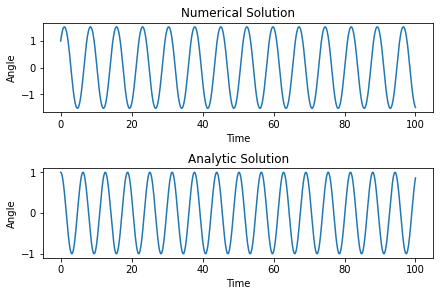

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import math

def analytic(omega):
    tf = 100
    ti = 0
    dt = 0.001
    n_iterations = math.ceil( (tf - ti) / dt )
    
    t = np.arange(ti, tf, dt)
    phi = np.zeros(n_iterations, dtype=float)
    
    phi = np.cos(omega * t)
    return t, phi    
    

def solve():
    tf = 100
    ti = 0
    dt = 0.001
    n_iterations = math.ceil( (tf - ti) / dt )
    
    phi = np.zeros(n_iterations, dtype=float)
    dphi = np.zeros(n_iterations, dtype=float)
    t = np.zeros(n_iterations, dtype=float)
    
    T = np.zeros(n_iterations, dtype=float)
    V = np.zeros(n_iterations, dtype=float)
    E = np.zeros(n_iterations, dtype=float)
    
    # Initial Conditions
    phi[0] = 1
    dphi[0] = 1
    
    m = 1
    g = 1
    l = 1
    omega = math.sqrt(g / l)
    
    T[0] = (1/2) * 1 * dphi[0]**2
    V[0] = 1 * (1 - math.cos(phi[0]))
    E[0] = V[0] + T[0]
    
    for i in range(n_iterations - 1):
        # Get accelerations
        a = -omega**2 * math.sin(phi[i])
        phi[i+1] = phi[i] + dphi[i]*dt + 0.5*a*(dt**2)
        
        ap = -omega**2 * math.sin(phi[i+1])
        dphi[i+1] = dphi[i]+ 0.5*(a + ap)*dt
        
        t[i+1] = t[i] + dt
        
        T[i+1] = (1/2) * m * dphi[i]**2
        V[i+1] = m*g*l * (1 - math.cos(phi[i]))
        E[i+1] = E[i] + T[i] + V[i]
        
    return (t, phi, T, V, E)

(t, phi, T, V, E) = solve()
(ta, phia) = analytic(1)
 
(fig, ax) = plt.subplots(nrows=2, ncols=1, constrained_layout=True)

ax[0].plot(t, phi)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Angle")
ax[0].set_title("Numerical Solution")

ax[1].plot(t, phia)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Angle")
ax[1].set_title("Analytic Solution")

plt.show()

It would appear that the analytic solution and the numerical solution are already at odds, at least partially. 

> ### F.

We would expect that the kinetic energy could be given as

$$
    T = \frac{1}{2} m v^2 = \frac{1}{2} m l^2 \dot{\phi}^2
$$

We would also expect that the potential would be expressed as

$$
    V = m g h = m g l \left( 1 - \cos{\phi} \right)
$$

Because we are in an inertial frame of reference, we would expect that the kinetic energy be conserved.

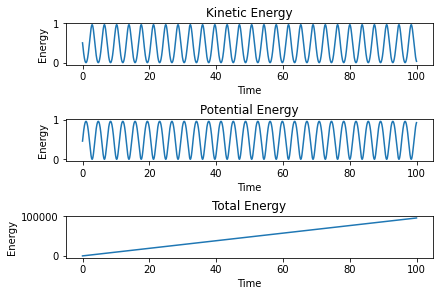

In [72]:
(fig, ax) = plt.subplots(nrows=3, ncols=1, constrained_layout=True)

ax[0].plot(t, T)
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Energy")
ax[0].set_title("Kinetic Energy")
                
ax[1].plot(t, V)
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Energy")
ax[1].set_title("Potential Energy")

ax[2].plot(t, E)
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Energy")
ax[2].set_title("Total Energy")

plt.show()

Well, that seems to be odd. We see an increase in energy even though this is not what we expected. Something must be wrong with the code.

## Exercise 2: Rotating Pendulum in a Gravitational Field

> ### A.

We are told that the pendulum is rotating with a constant angular velocity $\mathbf{\Omega}$

We know that the basis vectors $\hat{\mathbf{i}}, \hat{\mathbf{j}}, \hat{\mathbf{k}}$ will change like

$$
    \frac{d \mathbf{e}_i}{dt} = \mathbf{\Omega} \times \mathbf{e}_i
$$

Where $\mathbf{e}_i$ is the ith basis vector corresponding to either $\hat{\mathbf{i}}, \hat{\mathbf{j}}, \hat{\mathbf{k}}$

We can then find that the velocity vector is given as

$$
    \left(\frac{d \mathbf{r}}{dt}\right)_{S_0} = \left(\frac{d \mathbf{r}}{dt}\right)_{S} + \mathbf{\Omega} \times \mathbf{r}
$$

We can find the acceleration vector as

$$
    \left(\frac{d^2 \mathbf{r}}{dt^2}\right)_{S_0} = \ddot{\mathbf{r}} + 2 \mathbf{\Omega} \times \dot{\mathbf{r}} + \mathbf{\Omega} \times \left( \mathbf{\Omega} \times \mathbf{r} \right)
$$

We can then find that the acceleration in the rotating frame S is

$$
    m \ \ddot{\mathbf{r}} = \mathbf{F} + 2m \dot{\mathbf{r}} \times \mathbf{\Omega} + m\left( \mathbf{\Omega} \times \mathbf{r} \right) \times \mathbf{\Omega}
$$

Where $\mathbf{F}$ is the sum of all internal forces in the inertial frame.

We can then define this as

$$
    m \ \ddot{\mathbf{r}} = \mathbf{F} + \mathbf{F}_{\text{cor}} + \mathbf{F}_{\text{cf}}
$$

Examining the rotating pendulum in a gravitational field, we can find that

$$
    m \ \ddot{\mathbf{r}} = \mathbf{T} + m \mathbf{g}_o + m \left( \mathbf{\Omega} \times \mathbf{r} \right) \times \mathbf{\Omega} + 2 m \dot{\mathbf{r}} \times \mathbf{\Omega}
$$

This can simplify down to 

$$
    m \ \ddot{\mathbf{r}} = \mathbf{T} + m \mathbf{g} + m \left( \mathbf{\Omega} \times \mathbf{r} \right) \times \mathbf{\Omega}
$$

The coriolis term disappears as we simplify our equation as well as using the observed free fall acceleration $\mathbf{g}$

> ### B.

If we assume that

$$
    \mathbf{\Omega} = \sqrt{\frac{g}{l}}
$$

Then we would have

$$
    m \ \ddot{\mathbf{r}} = \mathbf{T} + m \mathbf{g} + m \left( \sqrt{\frac{g}{l}} \hat{\mathbf{\Omega}} \times \mathbf{r} \right) \times \sqrt{\frac{g}{l}} \hat{\mathbf{\Omega}}
$$


# Coupled Harmonic Oscillators

> ### A.

![Image](coupled-springs.jpg)

We can see that the resulting forces are given as

$$
    m \ddot{x}_1 = -k x_1 + k \left( x_2 - x_1 \right), \\
    m \ddot{x}_2 = - k \left( x_2 - x_1 \right)
$$

> ### B.

We know that the Lagrangian is given as

$$
    \mathcal{L} = T - V
$$

The Lagrangian can be found as

$$
    \mathcal{L} = \frac{1}{2} m \dot{x}_1^2 + \frac{1}{2} m \dot{x}_2^2 - \frac{1}{2} k x_1^2 - \frac{1}{2} k \left( x_2 - x_1 \right)^2 - \frac{1}{2} k x_2^2
$$

> ### C.

We want to solve for

$$
    \frac{\partial \mathcal{L}}{\partial x_1} = \frac{d}{dt} \frac{\partial \mathcal{L}}{d \dot{x}_1}, \quad \frac{\partial \mathcal{L}}{\partial x_2} = \frac{d}{dt} \frac{\partial \mathcal{L}}{d \dot{x}_2}
$$

We will obtain the following results

$$
    \frac{\partial \mathcal{L}}{\partial x_1} = \frac{d}{dt} \frac{\partial \mathcal{L}}{d \dot{x}_1} = m \ddot{x}_1 \\
    \frac{\partial \mathcal{L}}{\partial x_2} = \frac{d}{dt} \frac{\partial \mathcal{L}}{d \dot{x}_2} = m \ddot{x}_2
$$

This of course makes sense, as we would expect the Lagrangian equations to be equivalent to the Newtonian equations.